In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import itertools
from random import sample
import pickle
from scipy.spatial import distance
import time
import sys
from skmob.measures import evaluation

import seaborn as sns

%matplotlib inline
from matplotlib import pyplot as plt
#plt.rcParams["figure.figsize"] = [36.4, 15]
#plt.rcParams["figure.autolayout"] = True


import random
random.seed(3110)

In [2]:
with open("../TaxiNYC/v_test.txt", "rb") as fp:   # Unpickling
            test_set = pickle.load(fp)
with open("../TaxiNYC/fake_set.txt", "rb") as fp:   # Unpickling
            fake_set = pickle.load(fp)
with open("../TaxiNYC/fake_set_gravity.txt", "rb") as fp:   # Unpickling
            fake_set_gravity = pickle.load(fp)  
with open("../TaxiNYC/fake_set_radiation.txt", "rb") as fp:   # Unpickling
            fake_set_radiation = pickle.load(fp)
with open("../TaxiNYC/fake_set_random.txt", "rb") as fp:   # Unpickling
            fake_set_random = pickle.load(fp)
with open("../TaxiNYC/fake_set_random_weighted.txt", "rb") as fp:   # Unpickling
            fake_set_random_weighted = pickle.load(fp)

In [3]:
somma = 0
i_test = 0
for i,t in enumerate(test_set):
    if np.sum(t) > somma:
        somma = np.sum(t)
        i_test = i
i_test

134

In [4]:
somma = 0
i_mogan = 0
for i,t in enumerate(fake_set):
    if np.sum(t) > somma:
        somma = np.sum(t)
        i_mogan = i
i_mogan

44

In [5]:
somma = 0
i_gravity = 0
for i,t in enumerate(fake_set_gravity):
    if np.sum(t) > somma:
        somma = np.sum(t)
        i_gravity = i
i_gravity

21

In [6]:
somma = 0
i_radiation = 0
for i,t in enumerate(fake_set_radiation):
    if np.sum(t) > somma:
        somma = np.sum(t)
        i_radiation = i
i_radiation

134

In [7]:
somma = 0
i_random = 0
for i,t in enumerate(fake_set_random):
    if np.sum(t) > somma:
        somma = np.sum(t)
        i_random = i
i_random

39

In [8]:
somma = 0
i_random_weighted = 0
for i,t in enumerate(fake_set_random_weighted):
    if np.sum(t) > somma:
        somma = np.sum(t)
        i_random_weighted = i
i_random_weighted

137

In [12]:
m0 = test_set[i_test]
m1 = fake_set[i_mogan]
m2 = fake_set_gravity[i_gravity]
m3 = fake_set_radiation[i_radiation]
m5 = fake_set_random_weighted[i_random_weighted]

In [10]:
massimo = np.max([m0,m1,m2,m3,m4,m5])

/opt/anaconda3/envs/skm/lib/python3.7/site-packages/ipykernel_launcher.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/opt/anaconda3/envs/skm/lib/python3.7/site-packages/ipykernel_launcher.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/opt/anaconda3/envs/skm/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


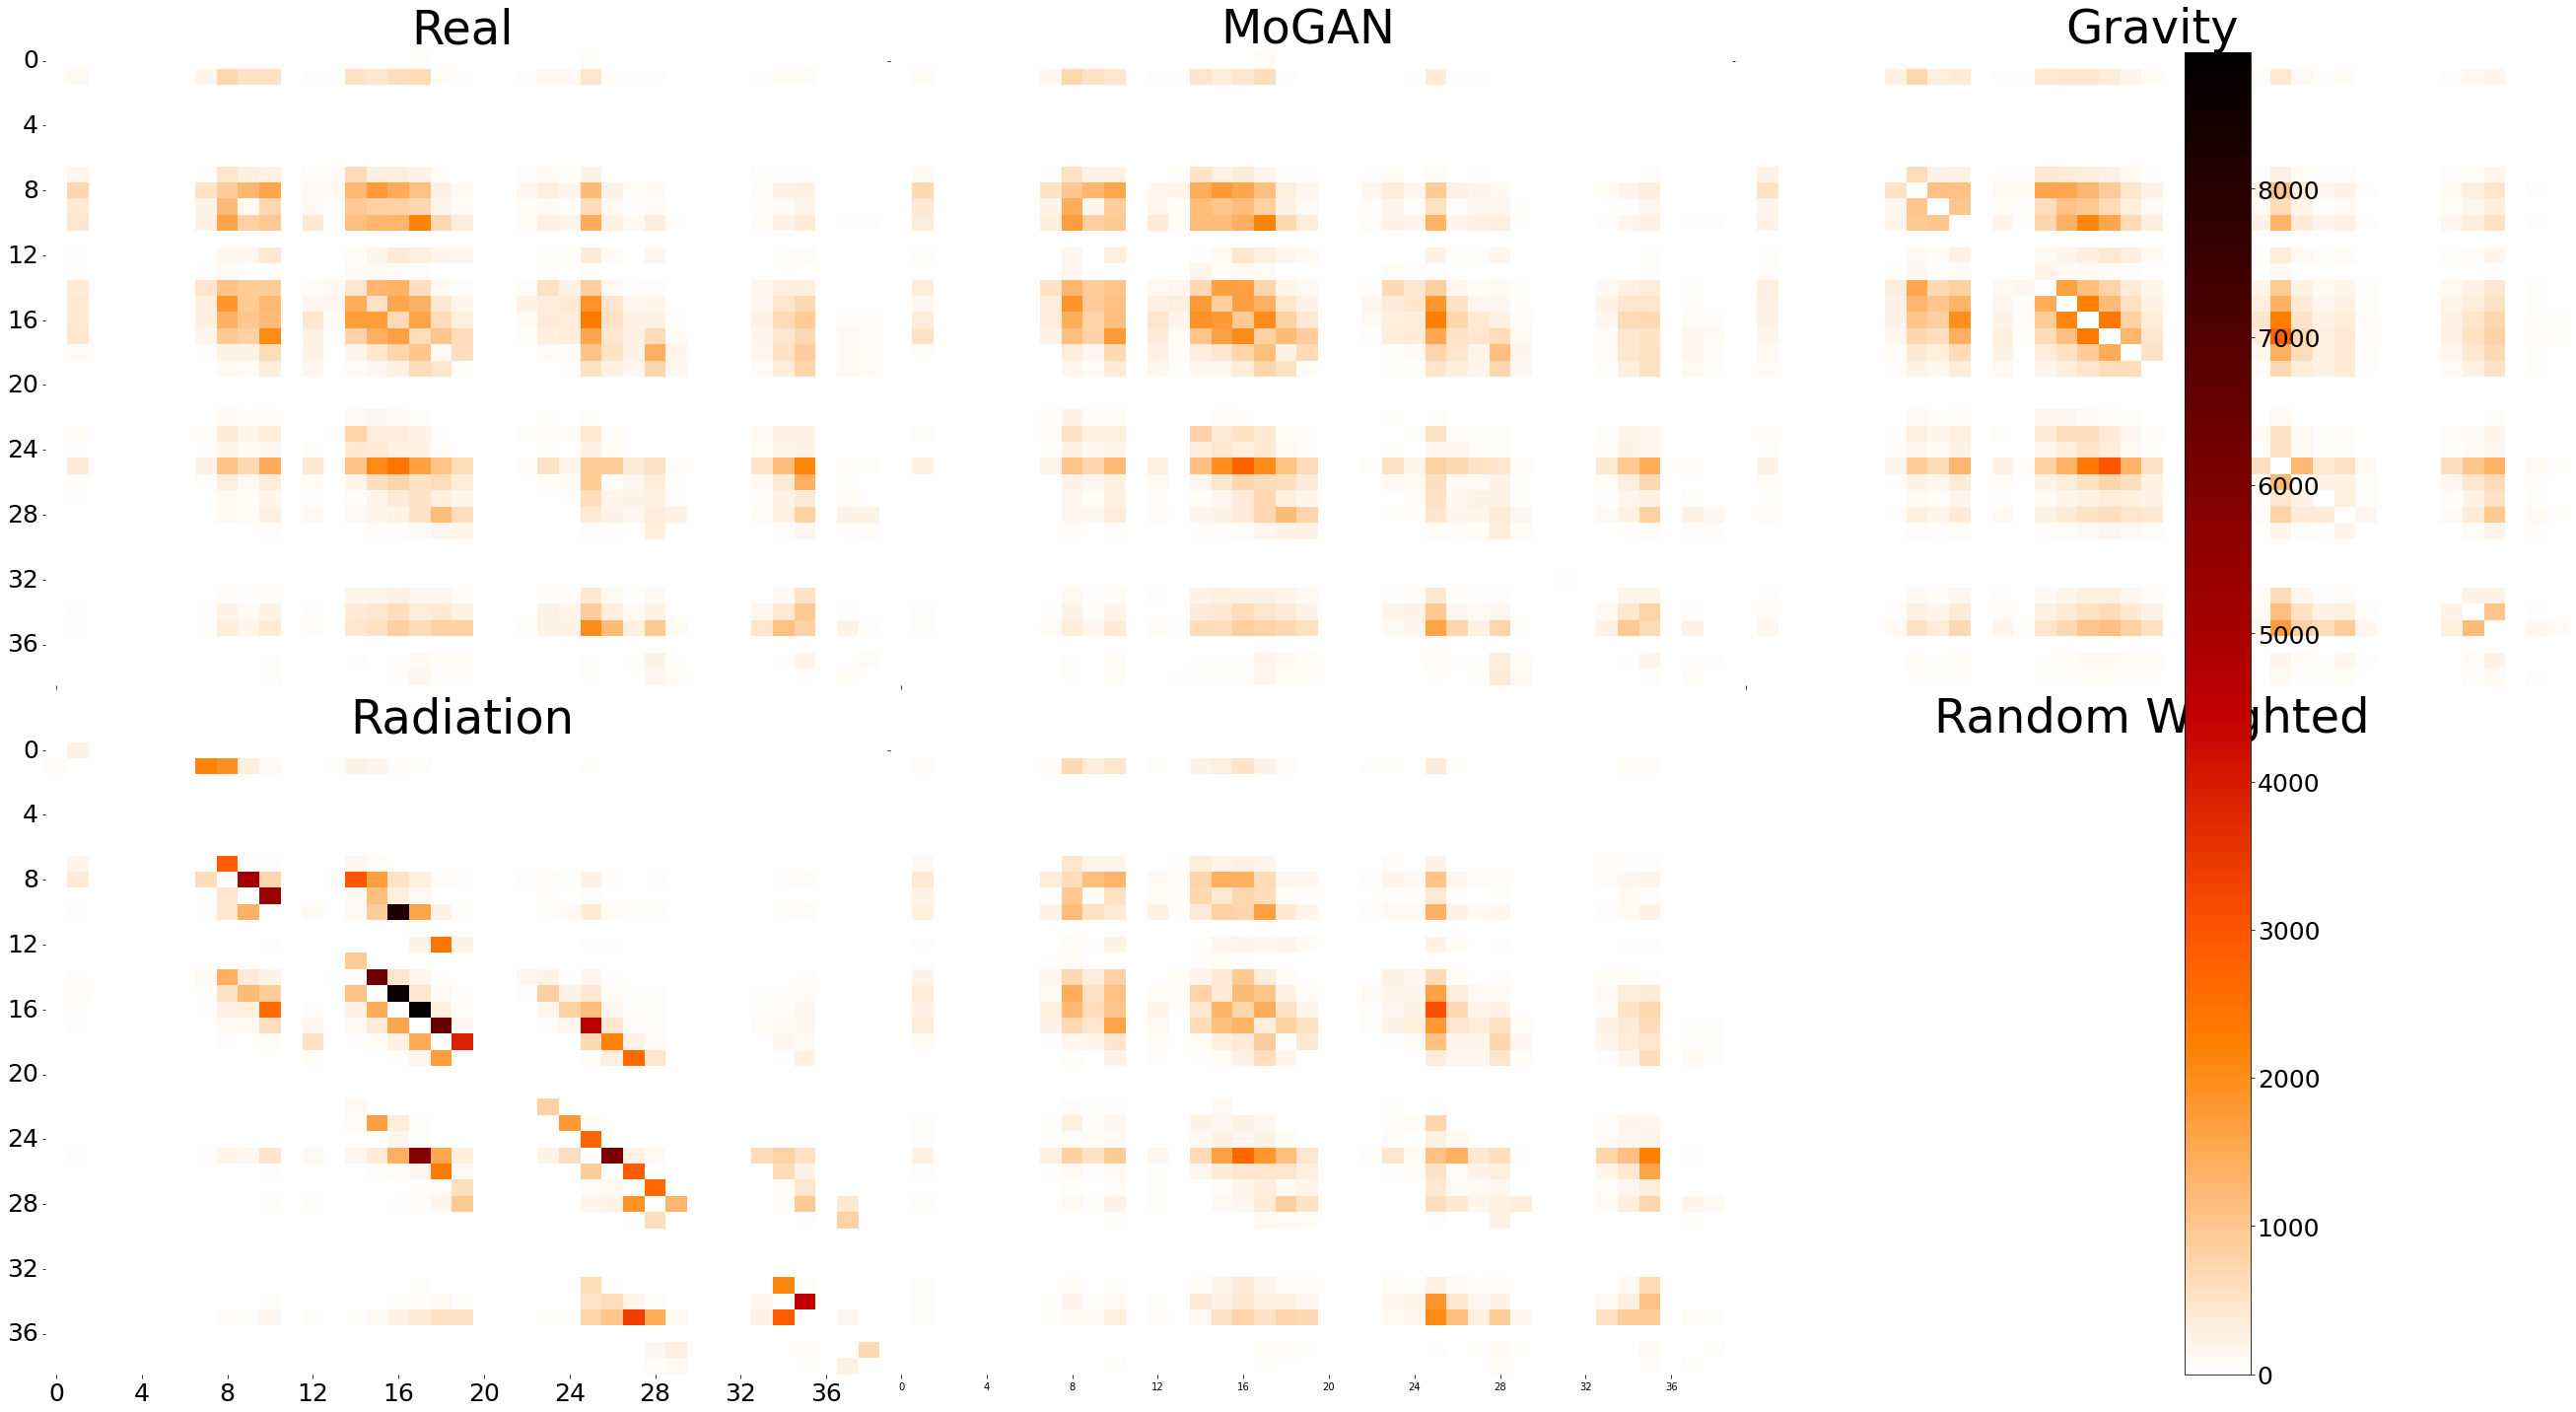

In [13]:
plt.rcParams["figure.figsize"] = [36.4, 20]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots(2, 3)
fig.tight_layout()
cbar_label = 25

lw = 0.00000001
lc = "black"
lc = "#6e6464"

im = sns.heatmap(m0[5:44,5:44], ax=ax[0,0], cmap='gist_heat_r', xticklabels = [""], yticklabels = 4,  linecolor=lc, vmax = massimo,  cbar = False)
ax[0,0].set_title('Real',fontsize=48)
ax[0,0].tick_params(axis='both', which='major', labelsize=25)
ax[0,0].tick_params(axis='y', rotation=0)
#cbar = ax[0,0].collections[0].colorbar
#cbar.ax.tick_params(labelsize=cbar_label)


sns.heatmap(m1[5:44,5:44], ax=ax[0,1], cmap='gist_heat_r', xticklabels = [""], yticklabels = [""],  linecolor=lc, vmax = massimo,  cbar = False)
ax[0,1].set_title('MoGAN',fontsize=48)
ax[0,1].tick_params(axis='x', which='major', labelsize=25)
#cbar = ax[0,1].collections[0].colorbar
#cbar.ax.tick_params(labelsize=cbar_label)

sns.heatmap(m2[5:44,5:44], ax=ax[0,2], cmap='gist_heat_r', xticklabels = [""], yticklabels = [""],  linecolor=lc, vmax = massimo,  cbar = False)
ax[0,2].set_title('Gravity',fontsize=48)
ax[0,2].tick_params(axis='x', which='major', labelsize=25)
#cbar = ax[0,2].collections[0].colorbar
#cbar.ax.tick_params(labelsize=cbar_label)

sns.heatmap(m3[5:44,5:44], ax=ax[1,0], cmap='gist_heat_r', xticklabels = 4, yticklabels = 4,  linecolor=lc, vmax = massimo,  cbar = False)
ax[1,0].set_title('Radiation',fontsize=48)
ax[1,0].tick_params(axis='both', which='major', labelsize=25)
ax[1,0].tick_params(axis='y', rotation=0)
#cbar = ax[1,0].collections[0].colorbar
#cbar.ax.tick_params(labelsize=cbar_label)


sns.heatmap(m5[5:44,5:44], ax=ax[1,1], cmap='gist_heat_r', xticklabels = 4, yticklabels = [""],  linecolor=lc, vmax = massimo,  cbar = False)
ax[1,2].set_title('Random Weighted',fontsize=48)
ax[1,2].tick_params(axis='x', which='major', labelsize=25)
#cbar = ax[1,2].collections[0].colorbar
#cbar.ax.tick_params(labelsize=cbar_label)

ax[1,2].axis('off')


mappable = im.get_children()[0]
plt.colorbar(mappable, ax = ax, pad = -0.32)

cbar = ax[0,0].collections[0].colorbar
cbar.ax.tick_params(labelsize=cbar_label)


#plt.show()

plt.savefig("viz-multiple-scaled.pdf", bbox_inches='tight')